# Gym Locations _Basic-Fit_ and _Fit For Free_

### Imports and version info

In [1]:
# import modules and version info
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import geopandas as gpd
print(f'geopandas  {gpd.__version__}')

import matplotlib.pyplot as plt
print(f'matplotlib {sys.modules["matplotlib"].__version__}')

from shapely.geometry import Point
print(f'shapely    {sys.modules["shapely"].__version__}')

from pyproj import Proj, transform # conda install -c conda-forge pyproj
print(f'pyproj     {sys.modules["pyproj"].__version__}')

python     3.6.6
pandas     0.23.4
geopandas  0.3.0
matplotlib 2.2.2
shapely    1.6.4.post1
pyproj     1.9.5.1


### Read Data

In [2]:
# Read Data
gym = pd.read_csv('../data/gym_geo.csv', sep=';')
gym.columns = ['company', 'address', 'longitude', 'latitude']

### Read Shapefile

In [3]:
# Read Shapefile
gemeenten = gpd.read_file('../shapefiles/2018-Imergis_gemeentegrenzen_kustlijn.dbf')

### Transform latitude and longitude to the Shapefile CRS with `pyproj`

In [4]:
# Inspect Data
gym.head()

,company,address,longitude,latitude
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",6.628310,52.359735
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",6.650678,52.338138


In [5]:
# Transform
p1 = Proj(proj='lonlat', datum='WGS84')
p2 = Proj(gemeenten.crs)

x_list = list()
y_list = list()

for index, row in gym.iterrows():
    x, y = transform(p1, p2, row.longitude, row.latitude)
    x_list.append(x)
    y_list.append(y)

gym['x'] = x_list
gym['y'] = y_list

In [6]:
# Inspect Data
gym.head()

,company,address,longitude,latitude,x,y
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150,113382.577939,475411.107323
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571,109439.062080,516325.060905
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070,111960.540982,516469.082725
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",6.628310,52.359735,239501.388222,486371.013960
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",6.650678,52.338138,241066.621214,483994.854033


In [7]:
# Inspect Data
gym.info() # N.B. It is stil a Pandas DataFrame, not a GeoPandas GeoDataFrame!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
company      254 non-null object
address      254 non-null object
longitude    254 non-null float64
latitude     254 non-null float64
x            254 non-null float64
y            254 non-null float64
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


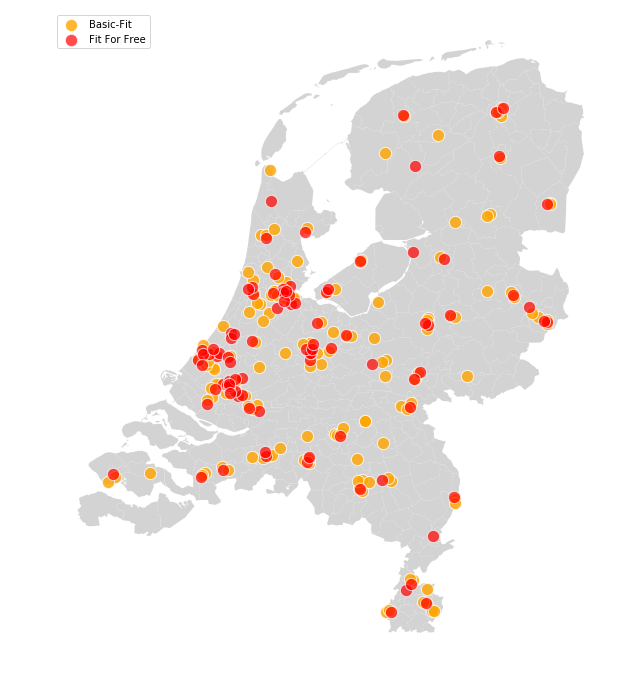

In [8]:
# Formated Plot
basicfit = gym[gym.company=='Basic-Fit']
fitforfree = gym[gym.company=='Fit For Free']

f, ax = plt.subplots(1, figsize=(10, 12))
ax = gemeenten.plot(ax=ax, color='lightgrey')
plt.scatter(x=basicfit.x, y=basicfit.y, c='Orange', edgecolor = 'white', s=150, alpha=0.8, label='Basic-Fit')
plt.scatter(x=fitforfree.x, y=fitforfree.y, c='red', edgecolor = 'white', s=150, alpha=0.7, label='Fit For Free')
ax.legend(loc='upper left')
plt.axis('off')
plt.show()